# Data Collection 

In [1]:
import tweepy
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
CONSUMER_KEY = "xxxxxxxxxxxxxxxx"
CONSUMER_SECRET = "xxxxxxxxxxxxxxxxxxxxxx" 
ACCESS_TOKEN = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
ACCESS_TOKEN_SECRET = "xxxxxxxxxxxxxxxxxxxxxxxxxx"

# Authenticate to Twitter
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [ ]:

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Enter your search words in accordance with the basic filtering rules
search_words = "(coronavirus OR covid OR pandemic OR covid19 OR lockdown) AND ( loneliness OR lonely OR depressed OR suicide OR sad) "

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

In [ ]:
# The Twitter data is stored in a Tweet object which we've called tweets
tweets = api.search(q=my_search,lang="en",tweet_mode="extended",count=100)
# Iterate and print tweets
i = 1
for tweet in tweets[0:20]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1 


1) So sad. Can the #Olympics2021 be an equal playing field when the vaccine distribution and management of covid by different nations are so vastly different? #inequality #vaccine https://t.co/151Kh8Lcaa

2) The sad thing is people was not washing their hands after using the red before #Covid 🤦🏽‍♀️ this virus has taught them nothing.  Just straight nasty 🤮 https://t.co/Uf5Haaglff

3) Disney fired back against Scarlett Johansson after the "Black Widow" actress filed a lawsuit against the studio, saying the suit is "sad and distressing in its callous disregard" of the COVID-19 pandemic. https://t.co/AD3Sbcc1Sn

4) Good dedinition for "a liberal"
https://t.co/f6qDvJ1Mw4

5) Suicide by covid is just... a year ago Refrigerated trucks used to store the dead human beings. Nation praying for cure. It's been available months now. Hooked up to a ventilator is too late for that preventive shot https://t.co/dmJEz6QqrM

6) Seeing our athletes cried makes me sad. The challenges they face to train si

In [ ]:
# Our new method of collecting the tweets
tweets = tweepy.Cursor(api.search,q=my_search,lang="en",tweet_mode='extended').items(1000)

In [ ]:
# Extract the info we need from the tweets object
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

In [ ]:
# Put our data into a dataframe 
df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df

,tweet_id_str,date_time,location,tweet_text
0,1421056413787246597,2021-07-30 10:33:45,,So sad. Can the #Olympics2021 be an equal play...
1,1421056105258622978,2021-07-30 10:32:32,USA,The sad thing is people was not washing their ...
2,1421055493766778884,2021-07-30 10:30:06,"New York, NY",Disney fired back against Scarlett Johansson a...
3,1421055457393741829,2021-07-30 10:29:57,United States,"Good dedinition for ""a liberal""\nhttps://t.co/..."
4,1421055324740542470,2021-07-30 10:29:26,"CA,NC,NV,TX,CO,FL,NM,MI🎙🎬",Suicide by covid is just... a year ago Refrige...
...,...,...,...,...
995,1420782827101167623,2021-07-29 16:26:37,,"Wow, so LIQUOROSE auditioned last year and was..."
996,1420782611358642188,2021-07-29 16:25:46,,Pay attention:\n@mtgreenee\n@laurenboebert \n@...
997,1420782595458027524,2021-07-29 16:25:42,"HI IM V, IM GOOD BOY",I’m so fucking depressed covid can you please ...
998,1420782490612948992,2021-07-29 16:25:17,00:00 •‿•,Huhuhu i love that they’re coming home to us a...


In [ ]:
#for i,tweet in enumerate(df['tweet_text'].head(20)):
   # print(i+1, tweet, '\n')

# Data Cleaning and Processing 

In [ ]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [ ]:
# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)

#for i,tweet in enumerate(df['tweet_text'].head(20)):
    #print(i+1, tweet, '\n')

In [ ]:
df['tweet_text']=df['tweet_text'].str.lower()


In [ ]:
# Get the list of NLTK stop words

stopwords = stopwords.words("english")

In [ ]:
# Define our own list of stopwords
my_stopwords = ['coronavirus','covid','pandemic','covid19','lockdown','amp','via']

# Extend the nltk stopwords list
stopwords.extend(my_stopwords)

In [ ]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [ ]:
# Apply the stopword removal function to the text of all tweets
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

(-0.5, 299.5, 199.5, -0.5)

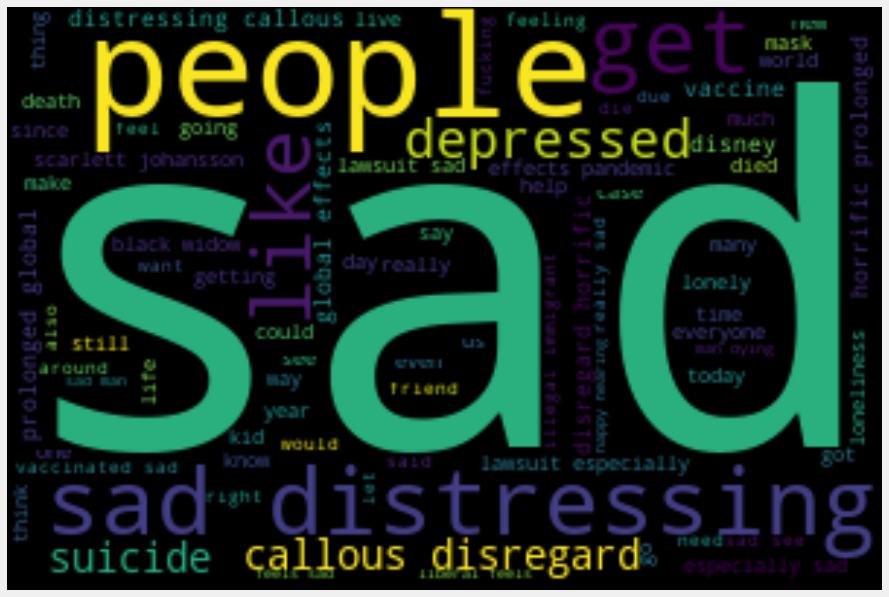

In [ ]:
# Plot a word cloud

all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=300, height=200, random_state=21, max_font_size = 300,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
#plt.show()

In [ ]:
df.to_csv('Simba_tweets.csv')

# Using ML

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from simpletransformers.classification import ClassificationModel

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import random
import numpy as np
import torch
from sklearn.model_selection import KFold

import logging
from pathlib import Path

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report 

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
df2 = pd.read_csv("labelled_data_preprocessed.csv")
# Display some useful information about the data in the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  4220 non-null   object
 1   label       4229 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.2+ KB


In [ ]:
# Drop all rows which contain a NaN, or null value in either column
df2= df2.dropna()

In [ ]:
df2['label'].value_counts()

1    1946
0    1527
2     747
Name: label, dtype: int64

In [ ]:
# make it binary classification challenge
binary_df = df2[(df2['label']==0) | (df2['label']==2) ] 


In [ ]:
# Change the label for positive sentiment from 2 to 1
binary_df['label'] = binary_df['label'].replace(2, 1) 


/opt/workshop/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
binary_df['label'].value_counts()

0    1527
1     747
Name: label, dtype: int64

In [ ]:
binary_df = df2[(df2.label==0) | (df2.label==2) ] # make it binary classification
binary_df.label.replace(2,1, inplace=True) # make it binary classification

pos_samples =binary_df[binary_df['label']==1]
neg_samples = binary_df[binary_df['label']==0].sample(len(pos_samples), random_state=42)

bal_binary_df = pd.concat([pos_samples, neg_samples])

binary_df['label'].value_counts()
bal_binary_df['label'].value_counts()

/opt/workshop/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


0    1527
1     747
Name: label, dtype: int64

1    747
0    747
Name: label, dtype: int64

In [ ]:
binary_df.value_counts()

tweet_text                                                                                                                 label
emergency physician say tough time 30 year career urge victorians understand reason behind new restriction . # 9news       0        5
firm link gove cummings give contract without open tender                                                                  0        3
40 florida hospital max icu capacity case surge across us                                                                  0        3
fatigue , frustration reveal limit response                                                                                0        2
trump blame china reiterate brazil live terrible situation                                                                 0        2
                                                                                                                                   ..
people really still party ... ... like                             

In [ ]:
train_df, val_df = train_test_split(binary_df, test_size=0.2,  random_state=42)

In [ ]:
train_df['label'].value_counts()
val_df['label'].value_counts()

0    1213
1     606
Name: label, dtype: int64

0    314
1    141
Name: label, dtype: int64

# BERT

In [ ]:
%%time
# ___Cell no. 30___

# Build the model

bert_model = ClassificationModel('bert',
                            'bert-base-cased',
                            num_labels=2,
                            use_cuda=False,
                            args={'overwrite_output_dir': True})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

CPU times: user 2.9 s, sys: 426 ms, total: 3.33 s
Wall time: 5.05 s


In [ ]:
%%time

# ___Cell no. 31___

# Train the model 
bert_model.train_model(train_df=train_df, eval_df=val_df)

/opt/workshop/lib/python3.6/site-packages/simpletransformers/classification/classification_model.py:278: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/opt/workshop/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/opt/workshop/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)



CPU times: user 49min 8s, sys: 58.5 s, total: 50min 7s
Wall time: 3min 29s


In [ ]:
# wrapper functions

def multi_F1(y_true, y_pred, average='macro'):
    return sklearn.metrics.f1_score(y_true=y_true, y_pred=y_pred, average=average)

def multi_classification_report(y_true, y_pred):
    return sklearn.metrics.classification_report(y_true=y_true, y_pred=y_pred)

In [ ]:
%%time

# ___Cell no. 33___

# Calculated and print out the f1 score

result, model_outputs, wrong_predictions = bert_model.eval_model(val_df, f1=multi_F1);
print('f1 score = ',result['f1'])

/opt/workshop/lib/python3.6/site-packages/simpletransformers/classification/classification_model.py:751: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."



f1 score =  0.8231198756007917
CPU times: user 2min 51s, sys: 880 ms, total: 2min 52s
Wall time: 11.9 s


In [ ]:
%%time

# ___Cell no. 34___

# Calculated and print out the results in the classification report

result, model_outputs, wrong_predictions = bert_model.eval_model(val_df, report=multi_classification_report);
print('Classification Report: ', result['report'])


Classification Report:                precision    recall  f1-score   support

           0       0.87      0.93      0.90       314
           1       0.81      0.70      0.75       141

    accuracy                           0.85       455
   macro avg       0.84      0.81      0.82       455
weighted avg       0.85      0.85      0.85       455

CPU times: user 2min 42s, sys: 893 ms, total: 2min 43s
Wall time: 11.3 s


In [ ]:
tweets = df['tweet_text']

In [ ]:
tweets.shape

(1000,)

In [ ]:
Result = bert_model.predict(tweets)
print(Result[0])


[0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0

In [ ]:
df['Bert_Sentiment'] = Result[0]

In [ ]:
def get_sentiment_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'    

In [ ]:
df

,tweet_id_str,date_time,location,tweet_text,Bert_Sentiment
0,1421056413787246597,2021-07-30 10:33:45,,sad. #olympics2021 equal playing field vaccine...,0
1,1421056105258622978,2021-07-30 10:32:32,USA,sad thing people washing hands using red #covi...,0
2,1421055493766778884,2021-07-30 10:30:06,"New York, NY",disney fired back scarlett johansson black wid...,0
3,1421055457393741829,2021-07-30 10:29:57,United States,good dedinition liberal,1
4,1421055324740542470,2021-07-30 10:29:26,"CA,NC,NV,TX,CO,FL,NM,MI🎙🎬",suicide ... year ago refrigerated trucks used ...,0
...,...,...,...,...,...
995,1420782827101167623,2021-07-29 16:26:37,,"wow , liquorose auditioned last year everyone ...",0
996,1420782611358642188,2021-07-29 16:25:46,,"pay attention , mr. bad advice #foxnews , lead...",0
997,1420782595458027524,2021-07-29 16:25:42,"HI IM V, IM GOOD BOY",fucking depressed please fuck ugh,0
998,1420782490612948992,2021-07-29 16:25:17,00:00 •‿•,huhuhu love coming home us lot lately im sad p...,1


In [ ]:
df['Bert_sntment']=df['Bert_Sentiment'].apply(get_sentiment_label)

In [ ]:
df

,tweet_id_str,date_time,location,tweet_text,Bert_Sentiment,Bert_sntment
0,1421056413787246597,2021-07-30 10:33:45,,sad. #olympics2021 equal playing field vaccine...,0,Neutral
1,1421056105258622978,2021-07-30 10:32:32,USA,sad thing people washing hands using red #covi...,0,Neutral
2,1421055493766778884,2021-07-30 10:30:06,"New York, NY",disney fired back scarlett johansson black wid...,0,Neutral
3,1421055457393741829,2021-07-30 10:29:57,United States,good dedinition liberal,1,Positive
4,1421055324740542470,2021-07-30 10:29:26,"CA,NC,NV,TX,CO,FL,NM,MI🎙🎬",suicide ... year ago refrigerated trucks used ...,0,Neutral
...,...,...,...,...,...,...
995,1420782827101167623,2021-07-29 16:26:37,,"wow , liquorose auditioned last year everyone ...",0,Neutral
996,1420782611358642188,2021-07-29 16:25:46,,"pay attention , mr. bad advice #foxnews , lead...",0,Neutral
997,1420782595458027524,2021-07-29 16:25:42,"HI IM V, IM GOOD BOY",fucking depressed please fuck ugh,0,Neutral
998,1420782490612948992,2021-07-29 16:25:17,00:00 •‿•,huhuhu love coming home us lot lately im sad p...,1,Positive


In [ ]:
del df['tweet_id_str']

<AxesSubplot:title={'center':'Mental Health Sentiment Analysis around the World'}, ylabel='People'>

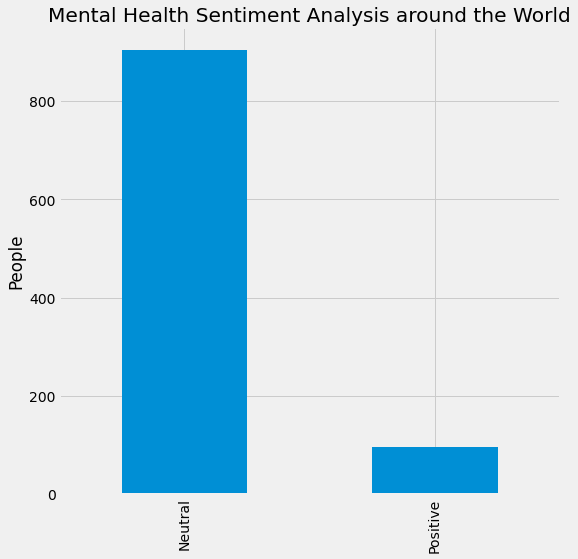

In [ ]:
df['Bert_sntment'].value_counts().plot(kind='bar',ylabel='People',title='Mental Health Sentiment Analysis around the World',figsize=(8,8))

# East African Region

In [ ]:
loc = "-0.0236,37.9062,1000km"

# Search dates
date_since = "2021-07-22"
date_until = "2021-07-29"
search_words_2="(coronavirus OR covid OR pandemic OR covid19 OR lockdown OR corona OR mask ) AND ( depression OR loneliness OR lonely OR depressed OR suicide OR sad OR dryspell OR suicidal OR unhappy) "
# We also want to exclude retweets and replies as this may sway results
my_search = search_words_2 + " -filter:retweets" + " -filter:replies"  
#for i,tweet in enumerate(df['tweet_text'].head(20)):
   # print(i+1, tweet, '\n')
    
# Use the tweepy Cursor method to access tweets from a specified region and between certain dates
tweets = tweepy.Cursor(api.search,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       since=date_since,
                       until=date_until).items(1000)

tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

# Put our data into a dataframe 
df_new = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])
df_new

,tweet_id_str,date_time,location,tweet_text
0,1420407821250793481,2021-07-28 15:36:29,"Kampala, Uganda","May his soul RIP, many depressed people every ..."
1,1420385626281680900,2021-07-28 14:08:17,"Kampala, Uganda",A boda boda rider identified as Geoffrey Dicks...
2,1420376994890588168,2021-07-28 13:33:59,"Nairobi, Kenya",IMPACT of COVID19 on mental health of youth?\n...
3,1420375756857880585,2021-07-28 13:29:04,kampala,Government instituted the 116 helpline for vio...
4,1420373293014654980,2021-07-28 13:19:16,Kampala,"Geoffrey Dickson Kasiita, a boda boda, 35, com..."
...,...,...,...,...
62,1418155599439749120,2021-07-22 10:26:57,"Kampala, Uganda",This is very true. The lockdown that was meant...
63,1418147781345267712,2021-07-22 09:55:53,"Mbale, Uganda",#UGANDA: a boda rider in Namisindwa commits su...
64,1418139555358720000,2021-07-22 09:23:12,"Nairobi, Kenya",Covid-19 is preventing us from visiting people...
65,1418098825588318211,2021-07-22 06:41:21,"Kampala, Uganda","Man, sometimes I get really sad for my country..."


<Figure size 1440x720 with 0 Axes>

(-0.5, 299.5, 199.5, -0.5)

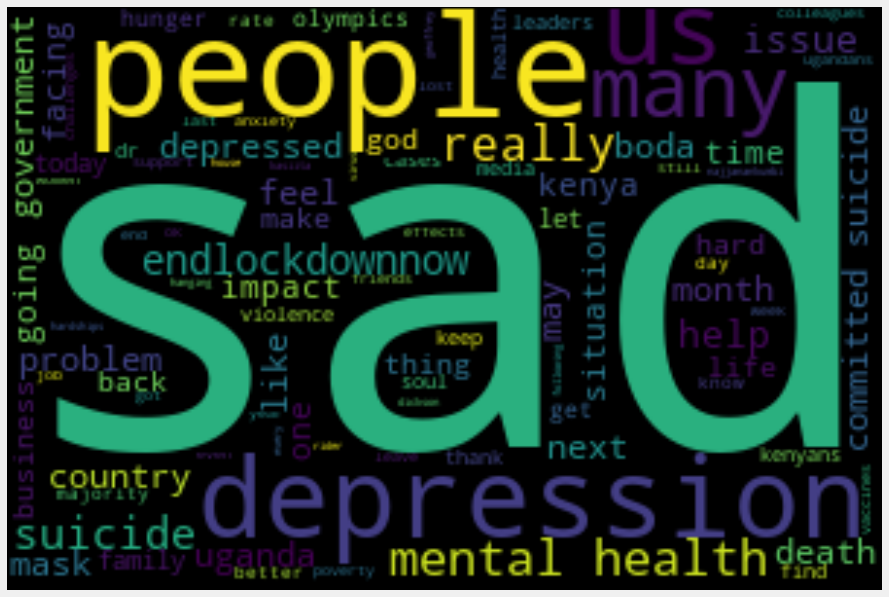

In [ ]:
df_new['tweet_text']=df_new['tweet_text'].apply(clean_text)
df_new['tweet_text']=df_new['tweet_text'].str.lower()
df_new['tweet_text']=df_new['tweet_text'].apply(remove_stopwords)
all_words = ' '.join( [data for data in df_new['tweet_text']])
word_cloud = WordCloud(width=300, height=200, random_state=21, max_font_size = 300,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tweets = df_new['tweet_text']
Result = bert_model.predict(tweets)
print(Result[0])


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
df_new['Bert_Sentiment'] = Result[0]

In [ ]:
df_new

,tweet_id_str,date_time,location,tweet_text,Bert_Sentiment
0,1420407821250793481,2021-07-28 15:36:29,"Kampala, Uganda","may soul rip , many depressed people every loc...",0
1,1420385626281680900,2021-07-28 14:08:17,"Kampala, Uganda",boda boda rider identified geoffrey dickson ka...,0
2,1420376994890588168,2021-07-28 13:33:59,"Nairobi, Kenya","impact mental health youth ? depression , subs...",0
3,1420375756857880585,2021-07-28 13:29:04,kampala,government instituted 116 helpline violence ca...,0
4,1420373293014654980,2021-07-28 13:19:16,Kampala,"geoffrey dickson kasiita , boda boda , 35 , co...",0
...,...,...,...,...,...
62,1418155599439749120,2021-07-22 10:26:57,"Kampala, Uganda",true. meant save people creating problems. peo...,0
63,1418147781345267712,2021-07-22 09:55:53,"Mbale, Uganda",#uganda boda rider namisindwa commits suicide ...,0
64,1418139555358720000,2021-07-22 09:23:12,"Nairobi, Kenya",19 preventing us visiting people next thing he...,0
65,1418098825588318211,2021-07-22 06:41:21,"Kampala, Uganda","man , sometimes get really sad country. locked...",0


In [ ]:
df_new['Bert_sntment'] = df_new['Bert_Sentiment'].apply(get_sentiment_label)

In [ ]:
df_new

,tweet_id_str,date_time,location,tweet_text,Bert_Sentiment,Bert_sntment
0,1420407821250793481,2021-07-28 15:36:29,"Kampala, Uganda","may soul rip , many depressed people every loc...",0,Neutral
1,1420385626281680900,2021-07-28 14:08:17,"Kampala, Uganda",boda boda rider identified geoffrey dickson ka...,0,Neutral
2,1420376994890588168,2021-07-28 13:33:59,"Nairobi, Kenya","impact mental health youth ? depression , subs...",0,Neutral
3,1420375756857880585,2021-07-28 13:29:04,kampala,government instituted 116 helpline violence ca...,0,Neutral
4,1420373293014654980,2021-07-28 13:19:16,Kampala,"geoffrey dickson kasiita , boda boda , 35 , co...",0,Neutral
...,...,...,...,...,...,...
62,1418155599439749120,2021-07-22 10:26:57,"Kampala, Uganda",true. meant save people creating problems. peo...,0,Neutral
63,1418147781345267712,2021-07-22 09:55:53,"Mbale, Uganda",#uganda boda rider namisindwa commits suicide ...,0,Neutral
64,1418139555358720000,2021-07-22 09:23:12,"Nairobi, Kenya",19 preventing us visiting people next thing he...,0,Neutral
65,1418098825588318211,2021-07-22 06:41:21,"Kampala, Uganda","man , sometimes get really sad country. locked...",0,Neutral


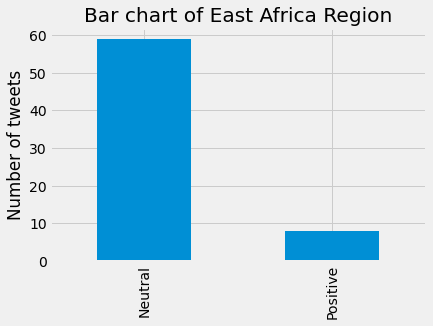

In [ ]:
df_new['Bert_sntment']
df_new['Bert_sntment'].value_counts().plot(kind='bar',ylabel='Number of tweets',title='Bar chart of East Africa Region');

<AxesSubplot:>

Text(0.5, 1.0, 'Bar chart of the World')

Text(0, 0.5, 'Number of tweets')

<AxesSubplot:>

Text(0.5, 1.0, 'Bar chart of East Africa Region')

Text(382.8977272727273, 0.5, 'Number of tweets')

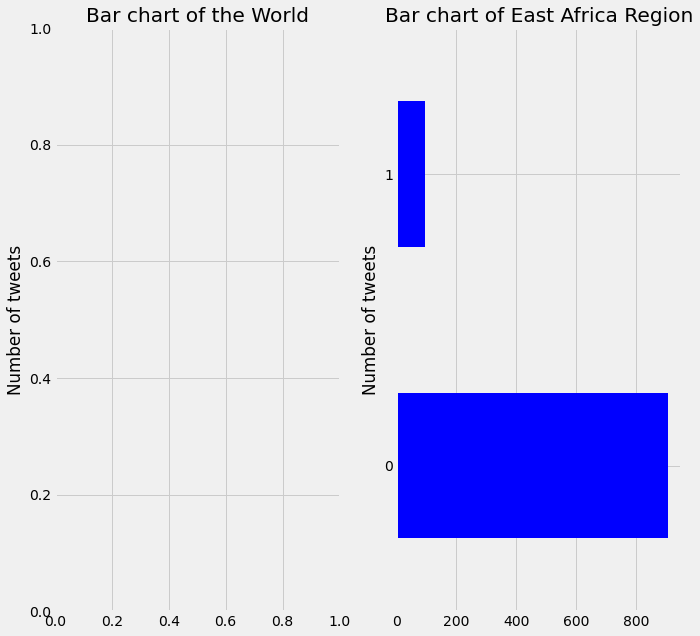

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

df['Bert_Sentiment'].value_counts().plot(kind='barh',color='blue',figsize=(10,10))
ax0.set_title('Bar chart of the World')
ax0.set_ylabel('Number of tweets')
plt.savefig('simba1', dpi=360)


df_new['Bert_Sentiment'].value_counts().plot(kind='barh',color='blue',figsize=(10,10))
ax1.set_title('Bar chart of East Africa Region')
ax1.set_ylabel('Number of tweets')


In [ ]:
df['location'].dropna(inplace=True)